# Machine Learning II: Introducción a los Métodos de Clasificación Supervisada

CONCEPTOS

## PARTE 1: Un enfoque práctico para Machine Learning

1. Acerca del software.

2. ¿Qué es Machine Learning?

3. Modelando el problema de Machine Learning

4. El problema de clasificación supervisada. Un ejemplo programático básico guiado

    4.1 Representación del problema en sklearn
    
    4.2 Aprendiendo y prediciendo
    
    4.3 Más sobre el 'feature space'
    
    4.4 Entrenamiento y prueba
    
    4.5 Selección de modelos (I)

## PARTE 2: Conceptos de aprendizaje y teoría

5. ¿Qué es aprender?

    5.1 Aprendizaje PAC
      
6. Dentro del modelo de aprendizaje

    6.1 El algoritmo de aprendizaje Machine Learning humano
    
    6.2 Clase de modelo y espacio de hipótesis
    
    6.3 Función objetivo
    
    6.4 Algoritmo de búsqueda/optimización/aprendizaje
    
7. Curvas de aprendizaje y sobreajuste (Overfitting)

    7.1 Curvas de aprendizaje
    
    7.2 Sobreajuste
        
8. Curas para el sobreajuste

    8.1 Selección de modelos (II)
    
    8.2 Regularización
    
    8.3 Conjunto
    
9. ¿Qué hacer cuando...?

## PARTE 3: Primeros modelos

10. Modelos generativos y discriminativos
    
    10.1 Modelos bayesianos (Naive Bayes) y algunas aplicaciones.
    
    10.2 Máquinas de Vectores de Soporte (Support Vector Machines).



# PARTE 2: Conceptos de aprendizaje y teoría

# 5. ¿Qué es aprender?

En machine learning, el viaje desde los datos brutos hasta un modelo confiable involucra la comprensión de varios conceptos clave que son cruciales para crear modelos que no solo funcionen bien con datos conocidos, sino que también se puedan generalizar a nuevos datos no vistos. Dos de estos conceptos fundamentales son el **error de entrenamiento** (o error dentro de la muestra) y el **error de generalización** (o error de prueba). Profundicemos en estos términos y su significado en el proceso de aprendizaje.

#### Error de Entrenamiento (Error dentro de la muestra), $E_{\text{in}}$

El **error de entrenamiento**, denotado como $E_{\text{in}}$, es la tasa de error o pérdida calculada sobre el conjunto de datos de entrenamiento. El conjunto de entrenamiento consiste en todas las muestras de datos observadas y utilizadas durante la fase de aprendizaje del modelo. Este error mide qué tan bien el modelo ha aprendido a predecir o ajustarse a los datos con los que fue entrenado. Un error de entrenamiento más bajo indica que el modelo ha capturado efectivamente los patrones subyacentes en los datos de entrenamiento.

#### Error de Generalización (Error de Prueba), $E_{\text{out}}$

En contraste, el **error de generalización**, denotado como $E_{\text{out}}$, es una medida teórica de cómo de bien se desempeña el modelo entrenado con cualquier dato nuevo e inédito. Dado que estos datos no forman parte de la fase de entrenamiento, el error de generalización es una estimación de la capacidad del modelo para aplicar lo que ha aprendido a diferentes conjuntos de datos. En la práctica, aproximamos $E_{\text{out}}$ utilizando técnicas como la validación cruzada y evaluando el modelo en un conjunto de datos de prueba separado.

#### La Relación Entre $E_{\text{in}}$ y $E_{\text{out}}$

Una de las intuiciones fundamentales en machine learning es la observación de que:

$$E_{\text{out}} \geq E_{\text{in}}.$$

Esta desigualdad destaca que el error en datos nuevos e inéditos generalmente es más alto que el error en los datos de entrenamiento. Esto tiene sentido intuitivo porque los modelos tienden a ajustarse a los datos en los que se entrenaron, y los nuevos datos pueden presentar patrones o variaciones no capturados durante el entrenamiento.

##### El Objetivo del Aprendizaje

El objetivo último del aprendizaje en machine learning es minimizar el error de generalización, $E_{\text{out}}$. Sin embargo, dado que solo controlamos directamente el proceso de entrenamiento, nuestras estrategias giran en torno a minimizar $E_{\text{in}}$ con la esperanza de que $E_{\text{out}}$ también sea bajo. Esto lleva a dos estrategias intuitivas:

1. **Minimizar el Error de Entrenamiento:** Apuntar a que $E_{\text{in}} \rightarrow 0$, lo que sugiere que el modelo está aprendiendo efectivamente los patrones dentro de los datos de entrenamiento.
2. **Cerrar la Brecha Entre el Error de Entrenamiento y de Generalización:** Asegurar que $E_{\text{out}} \approx E_{\text{in}}$. Esto es crucial para construir modelos que no solo funcionen bien en datos de entrenamiento sino que también generalicen efectivamente a nuevos datos. Expresamos este objetivo como:

   $$E_{\text{in}} \leq E_{\text{out}} \leq E_{\text{in}} + \Omega,$$

   donde $\Omega \rightarrow 0$. Aquí, $\Omega$ representa un pequeño margen de error, indicando que la diferencia entre $E_{\text{out}}$ y $E_{\text{in}}$ debe minimizarse.

#### Validación Cruzada: Una Herramienta para Estimar $E_{\text{out}}$

La validación cruzada es una técnica poderosa utilizada para estimar empíricamente el error de generalización. Al particionar los datos disponibles en múltiples conjuntos de entrenamiento y validación, podemos entrenar el modelo varias veces y promediar los resultados para obtener una estimación más precisa de cómo es probable que el modelo se desempeñe en datos no vistos.

#### Conclusión

Entender la relación entre el error de entrenamiento y el error de generalización es fundamental en machine learning. Al enfocarnos en minimizar $E_{\text{in}}$ mientras aseguramos que sigue de cerca a $E_{\text{out}}$, podemos crear modelos que sean tanto precisos como robustos, capaces de generalizar bien a nuevos datos no vistos.


## Aprendizaje Probablemente Aproximadamente Correcto (PAC)

En el ámbito del machine learning, un aspecto crucial para evaluar el rendimiento del modelo y garantizar su fiabilidad es entender cómo de cerca están las predicciones de nuestro modelo de ser correctas en datos no vistos, dados ciertos parámetros del problema. Este concepto está encapsulado en la teoría del Aprendizaje Probablemente Aproximadamente Correcto (Probably Approximately Correct, PAC). El aprendizaje PAC proporciona un marco para cuantificar el error de generalización, $E_{\text{out}}$, en términos del error de entrenamiento del modelo, $E_{\text{in}}$, y otros factores críticos como el número de muestras ($N$) y la dimensionalidad del problema ($d$).

### Caracterización de la Brecha del Error de Generalización, $\Omega$

Una de las ideas clave del aprendizaje PAC es la capacidad de caracterizar la brecha entre el error de entrenamiento y el error de generalización, $\Omega$, con respecto a la complejidad inherente del problema y del modelo. Esta brecha se puede representar matemáticamente como:

$$E_{\text{out}} \leq E_{\text{in}} + \mathcal{O}\big(\sqrt{\frac{\log{C}}{N}}\big),$$

donde $C$ representa la complejidad de la clase de modelos, también conocida como el espacio de hipótesis. Esta ecuación resalta cómo la diferencia entre el error de generalización y el error de entrenamiento está influenciada tanto por el número de muestras $N$ como por la medida de complejidad $C$ de la clase de modelos.

### El Papel de la Complejidad del Modelo y el Tamaño de la Muestra

- **Complejidad del Modelo ($C$):** La complejidad de la clase de modelos se refiere al rango de funciones o hipótesis que el modelo puede adoptar para ajustarse a los datos de entrenamiento. Un modelo más complejo tiene un espacio de hipótesis más grande, lo que le permite capturar patrones más intrincados en los datos. Sin embargo, los modelos de mayor complejidad también son más propensos al sobreajuste, capturando el ruido en los datos de entrenamiento como si fuera un patrón significativo, lo que puede afectar adversamente el error de generalización.

- **Número de Muestras ($N$):** El número de muestras en los datos de entrenamiento juega un papel crucial en determinar la precisión de las predicciones del modelo en nuevos datos no vistos. Con más muestras, el modelo tiene más información para aprender, lo que generalmente conduce a una mejor aproximación de la distribución de datos subyacente y, consecuentemente, una menor brecha entre los errores de entrenamiento y de generalización.

### Implicaciones del Aprendizaje PAC

El marco de aprendizaje PAC proporciona una base teórica poderosa para entender los compromisos entre la complejidad del modelo y el tamaño del conjunto de entrenamiento. Al caracterizar el error de generalización en términos de estos parámetros, el aprendizaje PAC ayuda a guiar la elección de la complejidad del modelo y la cantidad de datos necesaria para alcanzar un nivel deseado de rendimiento en datos no vistos. Subraya la importancia de equilibrar la complejidad del modelo con los datos disponibles para minimizar el sobreajuste mientras se asegura que el modelo sea suficientemente expresivo para capturar los patrones subyacentes en los datos.

### Conclusión

El aprendizaje PAC ofrece una perspectiva fundamental en machine learning, enfatizando el equilibrio entre el error de entrenamiento, la complejidad del modelo y el tamaño de la muestra. Al comprender y aplicar los principios del aprendizaje PAC, los practicantes pueden tomar decisiones informadas sobre la selección de modelos y las estrategias de entrenamiento, apuntando a modelos que no solo sean precisos en los datos de entrenamiento sino que también generalicen bien a nuevos datos no vistos.



**PREGUNTAS:**
<li> ¿Cuál será el efecto de tener un gran número de datos?
<li> ¿Seleccionar un modelo con baja complejidad reducirá el error fuera de la muestra?
</div>

Antes de profundizar en este asunto, abramos el melón del proceso de aprendizaje y observemos de qué partes se compone.

# 6. Dentro del proceso de aprendizaje

Consideremos un problema bidimensional simple.

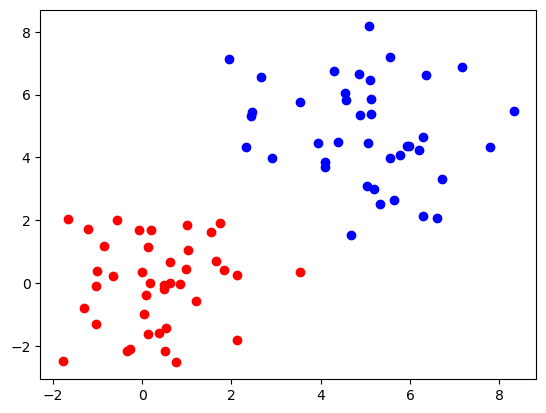

In [1]:
#from sklearn import 
import numpy as np

#Create some data
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

#Visualize
import matplotlib.pyplot as plt
plt.scatter(X[0:40,0],X[0:40,1],color='r')
plt.scatter(X[40:,0],X[40:,1],color='b')

Para poder aprender, cualquier algoritmo debe definir al menos tres componentes:

+ **La clase de modelo/espacio de hipótesis** define la familia de modelos matemáticos que se utilizarán. El límite de decisión objetivo se aproximará a partir de un elemento de este espacio. Por ejemplo, podemos considerar la clase de modelos lineales. En este caso, nuestro límite de decisión será una línea si el problema se define en ${\bf R}^2$ y la clase de modelo es el espacio de todas las líneas posibles en ${\bf R}^2$.

    Las clases de modelos definen las propiedades geométricas de la función de decisión. Hay diferentes taxonomías, pero las más conocidas son las *familias* de modelos **lineales** y **no lineales**. Estas familias generalmente dependen de algunos parámetros. Y la solución a un problema de aprendizaje es la selección de un conjunto particular de parámetros, es decir, la selección de un modelo de instancia del espacio de clases de modelo. El espacio de clases de modelo también se llama **espacio de hipótesis**.
    
    La selección del mejor modelo dependerá de nuestro problema y de lo que queramos obtener del problema. El objetivo principal en el aprendizaje suele ser lograr el mínimo error/máximo rendimiento. Pero según lo que deseemos del algoritmo encontraremos diferentes algoritmos. Otras propiedades deseables comunes son la interpretabilidad, comportamiento frente a datos faltantes, entrenamiento rápido, etc.


+ **El modelo del problema** formaliza y codifica las propiedades deseadas de la solución. En muchos casos esta formalización toma la forma de un problema de optimización. En su instanciación más básica, el modelo del problema puede ser la **minimización de una función de error**. La función de error mide la diferencia entre nuestro modelo y el modelo objetivo. Informalmente hablando, en un problema de clasificación mide cuánto "nos irrita" cuando nuestro modelo no acierta la etiqueta correcta de una muestra de entrenamiento. Por ejemplo, en clasificación la función de error ideal es la **pérdida 0-1**. Esta función toma el valor $1$ cuando clasificamos incorrectamente una muestra de entrenamiento y cero en caso contrario. En este caso, se puede interpretar que solo se está irritado por "una unidad de irritación" cuando una muestra está mal clasificada.

    El modelo del problema también puede usarse para imponer otras restricciones en nuestra solución, como encontrar una aproximación suave, un modelo de baja complejidad, una solución dispersa, etc.
    
    
+ **El algoritmo de aprendizaje** es un método de optimización/búsqueda o algoritmo que, dado una clase de modelo, lo ajusta a los datos de entrenamiento según la función de error. Según la naturaleza de nuestro problema, hay muchos algoritmos diferentes. En general, estamos hablando de encontrar la aproximación de error mínimo o el modelo más probable máximo. En esos casos, si el problema es convexo/cuasi-convexo, típicamente usaremos métodos de primer o segundo orden (es decir, descenso de gradiente, descenso por coordenadas, método de Newton, métodos de punto interior, etc). Otras técnicas de búsqueda, como algoritmos genéticos o técnicas de monte-carlo, se pueden usar si no tenemos acceso a las derivadas de la función objetivo.



Vamos a utilizar el "algoritmo de machine learning humano". Mueve los parámetros hasta que sientas que la solución es correcta.

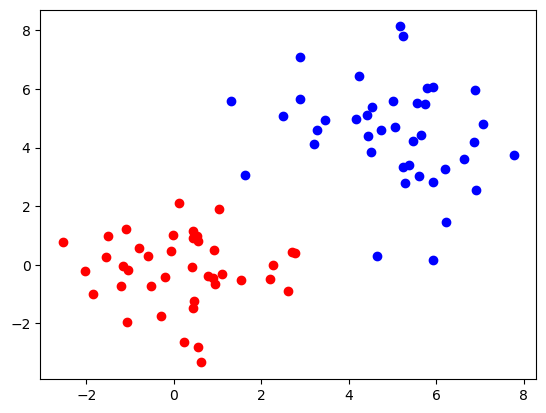

interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [3]:
# Ensure that plots are displayed inline in the Jupyter Notebook
%matplotlib inline

# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from IPython.html.widgets import interact  # For interactive widgets

# Generate synthetic data
# Create two sets of points with different means and standard deviations
X = np.concatenate([1.25*np.random.randn(40,2), 5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)), -np.ones((40,1))])

# Function to visualize the data and the decision boundary of a simple model
def human_learning_algorithm(X, y):
    # Plot the first set of points in red
    plt.scatter(X[0:40, 0], X[0:40, 1], color='r')
    # Plot the second set of points in blue
    plt.scatter(X[40:, 0], X[40:, 1], color='b')
    
    # Set up a grid of points for evaluating the model
    delta = 0.025
    xx = np.arange(-5.0, 10.0, delta)
    yy = np.arange(-5.0, 10.0, delta)
    XX, YY = np.meshgrid(xx, yy)  # Create a meshgrid for the XY plane
    Xf = XX.flatten()
    Yf = YY.flatten()
    sz = XX.shape
    data = np.concatenate([Xf[:, np.newaxis], Yf[:, np.newaxis]], axis=1)

    # Function to display the model's decision boundary
    def hml_display(w0, w1, offset):
        w = np.array([w0, w1])
        w.shape = (2, 1)
        # Evaluate the model for a given set of weights and offset
        Z = data.dot(w) + offset
        Z.shape = sz
        # Re-plot the data points
        plt.scatter(X[0:40, 0], X[0:40, 1], color='r')
        plt.scatter(X[40:, 0], X[40:, 1], color='b')
        # Display the decision boundary and the evaluation of the model on the grid
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5, 10, -5, 10), alpha=0.3, vmin=-15, vmax=15)
        plt.contour(XX, YY, Z, [0])  # Draw the contour line where the model output is zero
        fig = plt.gcf()
        fig.set_size_inches(9, 9)

    # Create interactive sliders for model parameters w0, w1, and offset
    interact(hml_display, w0=(-10., 10.), w1=(-10., 10.), offset=(-20., 40.))

# Call the function to display the initial plot and interactive widgets
human_learning_algorithm(X, y)

**PREGUNTA:** Describe el proceso que utilizaste para ajustar el clasificador
</div>

**Algunas notas sobre el proceso de aprendizaje**
<p>
El objetivo principal de cualquier proceso de aprendizaje es lograr el máximo poder predictivo (*precisión*). Esto es minimizar el error. Sin embargo, hay otras tres propiedades importantes que generalmente deseamos que nuestros modelos tengan:

<p>
<li> **Simplicidad** - ¿Cuánto ajuste necesitamos para que el método funcione? ¿Puedo modificarlo para manejar las particularidades de mi problema?
<li> **Velocidad** - ¿Cuánto tiempo se tarda en entrenar un modelo confiable? (tiempo de entrenamiento) ¿Puedo usarlo en aplicaciones integradas y en tiempo real? (tiempo de prueba), ¿Cuánto tengo que esperar para procesar mi conjunto de datos de 1YB (yottabyte - 1e24 Bytes)?
<li> **Interpretabilidad** - ¿Por qué hizo estas predicciones?

<p>
Sucede que la precisión se compensa con todas las demás propiedades deseables.
</div>

# 7. Curvas de aprendizaje y sobreajuste (Overfitting)

Volvamos a la capacidad de aprendizaje PAC.

In [4]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
from sklearn import neighbors

MAXC=50
MAXN=1000
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
perm = np.random.permutation(y.size)
X = X[perm,:]
y = y[perm]


def complexity_number(C,N):
    
    Xr=X[:N,:]
    yr=y[:N]
    idxplus = yr==1
    idxminus = yr==-1
    idxplus = idxplus.flatten()
    idxminus = idxminus.flatten()
    plt.scatter(Xr[idxplus,0],Xr[idxplus,1],color='r')
    plt.scatter(Xr[idxminus,0],Xr[idxminus,1],color='b')   
    delta = 0.05
    xx = np.arange(-5.0, 15.0, delta)
    yy = np.arange(-5.0, 15.0, delta)
    XX, YY = np.meshgrid(xx, yy)
    Xf = XX.flatten()
    Yf = YY.flatten()
    sz=XX.shape
    data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
    #Evaluate the model for a given weight
    clf = neighbors.KNeighborsClassifier(MAXC-C+1)
    clf.fit(Xr,yr.ravel())
    Z=clf.predict(data)
    Z.shape=sz
    plt.scatter(Xr[idxplus,0],Xr[idxplus,1],color='r')
    plt.scatter(Xr[idxminus,0],Xr[idxminus,1],color='b')
    plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
    plt.contour(XX,YY,Z,[0])
    fig = plt.gcf()
    fig.set_size_inches(9,9)
   
#Ipython 2.0
interact(complexity_number,  C=(1,MAXC), N = (20,MAXN));
#Ipython 1.1.
#C=1 #1...50
#N = 20 #20...1000
#complexity_number(C,N)

interactive(children=(IntSlider(value=25, description='C', max=50, min=1), IntSlider(value=510, description='N…

**EJERCICIO:**
<li> Establece el número de muestras de datos por grupo $N$ en $100$ y el valor de complejidad $C$ en $50$. Describe lo que observas: ¿El método clasifica incorrectamente alguna muestra de datos?
<li> Disminuye el valor de complejidad a $C = 20$. Describe el límite: ¿El método clasifica incorrectamente alguna muestra de datos?
<li> ¿Cuál de las dos configuraciones crees que funcionará mejor frente a nuevos datos de la misma distribución? ¿Por qué?
<li> Aumenta el número de puntos de datos a $N = 1000$ con $C=50$. Describe lo que observas. ¿El método funcionará mejor que el mismo método con $N=100$?
</div>

## 7.1 Curvas de aprendizaje

Visualicemos el comportamiento observado. Para este propósito, podemos trazar una curva del error de entrenamiento y del error de prueba a medida que aumenta el número de datos de entrenamiento para una complejidad dada. Esta curva se llama **curva de aprendizaje**.

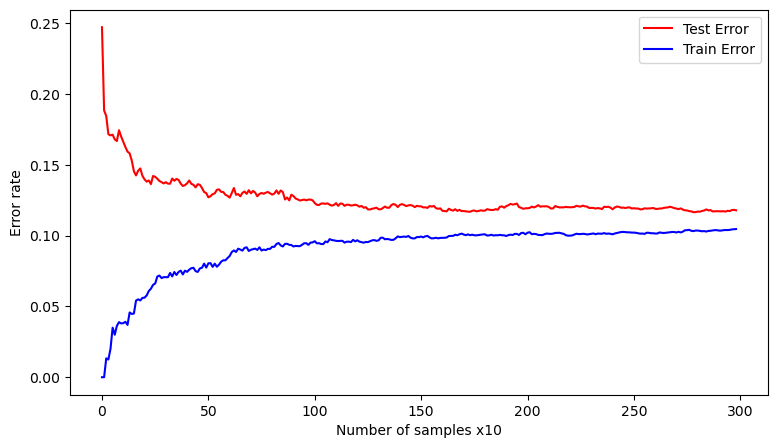

In [5]:
# Reset the namespace by removing all names defined by the user - force reset
%reset -f

# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from IPython.html.widgets import interact  # For interactive widgets (not used in this script but often useful for interactivity)
from sklearn import metrics  # For evaluating model performance
from sklearn import tree  # For decision tree models

# Define model complexity and maximum number of samples
C = 5
MAXN = 1000

# Initialize arrays to store error rates for 10 iterations and 299 sample sizes
yhat_test = np.zeros((10, 299, 2))
yhat_train = np.zeros((10, 299, 2))

# Repeat ten times to get smooth curves
for i in range(10):
    # Generate synthetic training data
    X = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X, [8, 5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)), -np.ones((MAXN,1))])
    y = np.concatenate([y, np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    # Generate synthetic testing data
    X_test = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test, [8, 5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)), -np.ones((MAXN,1))])
    y_test = np.concatenate([y_test, np.ones((MAXN,1))])

    j = 0
    # Incrementally increase training set size and evaluate the model
    for N in range(10, 3000, 10):
        Xr = X[:N,:]  # Select the first N samples for training
        yr = y[:N]
        
        # Train a decision tree classifier with specified complexity and depth
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr, yr.ravel())  # Fit the model to the training data
        
        # Evaluate the model on both the training and testing data
        yhat_test[i, j, 0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i, j, 0] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j += 1

# Plot the average error rates across all iterations
plt.plot(np.mean(yhat_test[:, :, 0].T, axis=1), 'r', label='Test Error')
plt.plot(np.mean(yhat_train[:, :, 0].T, axis=1), 'b', label='Train Error')
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.legend(loc='upper right')

**Entendiendo las Curvas de Aprendizaje**

El gráfico que estamos observando se conoce como "curva de aprendizaje". Representa cómo cambian las tasas de error de un modelo de machine learning a medida que aumenta el tamaño del conjunto de datos de entrenamiento. La línea roja denota el error en el conjunto de prueba (error de generalización), y la línea azul representa el error en el conjunto de entrenamiento (error de entrenamiento).

**Observaciones de la Curva de Aprendizaje**

- **Convergencia al Sesgo:** A medida que aumenta el número de muestras de entrenamiento, tanto el error de entrenamiento como el de prueba convergen hacia un valor estable. Este valor estable puede interpretarse como el sesgo inherente del modelo, que es la tasa de error que nuestro modelo siempre tendrá, incluso si tuviéramos una cantidad infinita de datos de entrenamiento. El sesgo es el resultado de que las suposiciones del modelo no se alinean perfectamente con las verdaderas relaciones en los datos subyacentes.

- **Sobreajuste con Conjuntos Pequeños de Entrenamiento:** Con una cantidad muy pequeña de datos de entrenamiento, el error de entrenamiento es bastante bajo, lo que podría parecer inicialmente positivo. Sin embargo, el error de prueba correspondiente es significativamente más alto, lo que indica que el modelo está sobreajustado. El sobreajuste ocurre porque el modelo aprende patrones que son específicos del pequeño conjunto de entrenamiento pero no se generalizan a la distribución más amplia de datos.

- **Meseta de la Tasa de Error:** Más allá de cierto punto, agregar más muestras de entrenamiento no resulta en mejoras sustanciales en el error de prueba. Esta meseta indica que simplemente agregar más datos no mejorará el rendimiento del modelo y sugiere que hemos alcanzado el límite de lo que el modelo puede aprender dado su capacidad actual.

**Explicación Teórica**

Las curvas de aprendizaje están basadas en la teoría del aprendizaje estadístico. Teóricamente, esperamos que el error de entrenamiento de un modelo aumente y el error de prueba disminuya a medida que crece el número de ejemplos de entrenamiento. Inicialmente, con pocos puntos de datos, un modelo es capaz de ajustarse muy de cerca a los datos de entrenamiento. A medida que se agregan más puntos de datos, se hace más difícil para el modelo ajustar todos los puntos perfectamente, por lo tanto, el error de entrenamiento aumenta. Por el contrario, con más datos, la generalización del modelo a datos no vistos mejora, por lo tanto, el error de prueba disminuye.

Sin embargo, ambos errores convergerán en un punto donde datos adicionales no cambian significativamente las tasas de error. Este punto de convergencia refleja el trade-off de sesgo y varianza inherente del modelo.

- **Sesgo:** Representa el error de suposiciones erróneas en el algoritmo de aprendizaje. Un alto sesgo puede hacer que el modelo no detecte relaciones relevantes entre las características y las salidas objetivo (subajuste).

- **Varianza:** Representa el error de sensibilidad a pequeñas fluctuaciones en el conjunto de entrenamiento. Una alta varianza puede causar sobreajuste: modelar el ruido aleatorio en los datos de entrenamiento, en lugar de las salidas previstas.

Optimizar un modelo implica encontrar el equilibrio adecuado entre sesgo y varianza, lo cual puede analizarse visualmente usando una curva de aprendizaje. Si la curva de aprendizaje ha alcanzado una meseta y todavía hay una brecha significativa entre los errores de entrenamiento y prueba, esto puede sugerir que el modelo tiene alta varianza. En este caso, obtener más datos de entrenamiento probablemente no conducirá a una mejor generalización. En su lugar, se podría considerar aumentar la complejidad del modelo o utilizar un algoritmo más sofisticado para reducir el sesgo.

En resumen, las curvas de aprendizaje son una herramienta de diagnóstico poderosa en machine learning. Ayudan a comprender el comportamiento de un modelo a medida que se dispone de más datos y a diagnosticar si el modelo sufre de alto sesgo o alta varianza. Este entendimiento puede guiar decisiones sobre si recopilar más datos, seleccionar un modelo más complejo o aplicar técnicas como la regularización serían beneficiosas para mejorar el rendimiento del modelo.

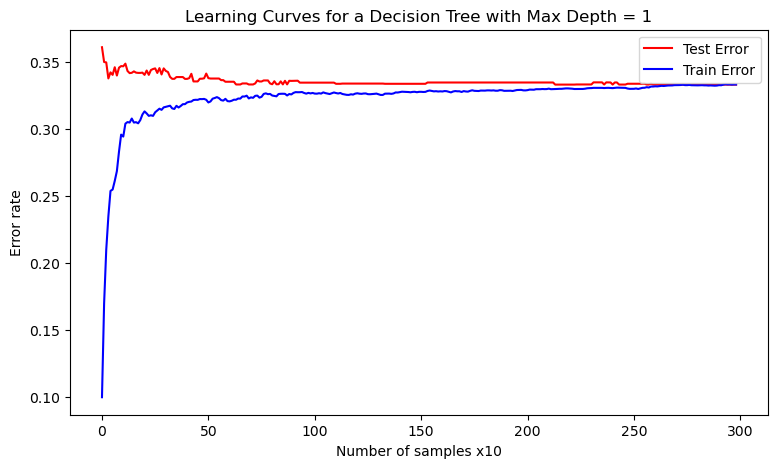

In [6]:
# Clear all variables from the current namespace to start fresh.
%reset -f

# Import necessary libraries.
import numpy as np  # For numerical operations.
import matplotlib.pyplot as plt  # For plotting graphs.
from sklearn import metrics  # For calculating model performance metrics.
from sklearn import tree  # For using decision tree models.

# Set the complexity of the decision tree to 1 (creating a simple model) and define the maximum number of samples.
C = 1
MAXN = 1000

# Initialize arrays to store error rates for 10 iterations and for different numbers of training samples.
yhat_test = np.zeros((10, 299, 2))
yhat_train = np.zeros((10, 299, 2))

# Repeat the experiment ten times to get smooth average curves.
for i in range(10):
    # Generate synthetic data for training.
    # Concatenate data from multiple normal distributions to create a diverse dataset.
    X = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X, [8, 5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)), -np.ones((MAXN,1))])
    y = np.concatenate([y, np.ones((MAXN,1))])
    
    # Shuffle the data to ensure randomness.
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    # Generate synthetic data for testing.
    # It's important to have a separate test dataset to evaluate the model's generalization.
    X_test = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test, [8, 5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)), -np.ones((MAXN,1))])
    y_test = np.concatenate([y_test, np.ones((MAXN,1))])
    
    # Train models with increasing amounts of training data and record their performance.
    j = 0
    for N in range(10, 3000, 10):
        # Take the first N samples for training.
        Xr = X[:N,:]
        yr = y[:N]
        
        # Train a decision tree classifier with a maximum depth of C.
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr, yr.ravel())  # Fit the model to the training data.
        
        # Predict on the test set and calculate the error rate.
        yhat_test[i, j, 1] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        # Predict on the training set and calculate the error rate.
        yhat_train[i, j, 1] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j += 1

# Plot the average test and training error rates across all iterations.
plt.plot(np.mean(yhat_test[:,:,1].T, axis=1), 'r', label='Test Error')
plt.plot(np.mean(yhat_train[:,:,1].T, axis=1), 'b', label='Train Error')

# Configure the plot with labels and set the figure size for better readability.
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.title('Learning Curves for a Decision Tree with Max Depth = 1')
plt.legend(loc='upper right')
plt.show()  # Display the plot.

**Análisis de Curvas de Aprendizaje con Menor Complejidad**

En el código proporcionado, repetimos un experimento para trazar curvas de aprendizaje de un clasificador de árbol de decisión, esta vez con una complejidad (`C`) de 1, indicando un modelo más simple con una profundidad máxima de 1. Al iterar este proceso diez veces y promediar los resultados, apuntamos a obtener curvas de aprendizaje suaves que representen el comportamiento promedio del modelo.

**Percepciones de Curvas de Aprendizaje con Modelos Más Simples**

- **Sesgo Aumentado:** Con `C` configurado en 1, el árbol de decisión es muy simple y probablemente tenga un alto sesgo, lo que significa que hace suposiciones fuertes sobre la forma del límite de decisión. En la práctica, esto puede llevar a un subajuste, donde el modelo es demasiado simplista para capturar la complejidad de los datos.

- **Tasas de Error Convergentes:** Similar al ejemplo anterior, a medida que aumenta el número de muestras de entrenamiento, esperamos que tanto los errores de entrenamiento como de prueba converjan. Sin embargo, debido al sesgo aumentado, pueden converger a una tasa de error más alta en comparación con un modelo más complejo.

- **Meseta de Tasa de Error:** La meseta o nivelación de la tasa de error ocurre a un valor más alto, lo que es indicativo de la capacidad limitada del modelo. Dado que el modelo es simple, podría no beneficiarse tanto de datos de entrenamiento adicionales más allá de cierto punto.

**Antecedentes Teóricos**

Las curvas de aprendizaje trazadas aquí se basan en la comprensión teórica del impacto de la complejidad del modelo en el aprendizaje. Un modelo más simple con `C=1` generalmente exhibirá las siguientes características:

- **Error de Entrenamiento Más Alto:** Un modelo más simple no se ajustará tan bien a los datos de entrenamiento, lo que lleva a un error de entrenamiento más alto.
  
- **Varianza Menor:** La brecha entre los errores de entrenamiento y prueba es típicamente más pequeña para modelos más simples, ya que son menos sensibles al ruido específico en los datos de entrenamiento.

- **Meseta Temprana:** Debido a la simplicidad del modelo, las tasas de error alcanzarán una meseta temprano, ya que hay menos capacidad para que el modelo aprenda de datos adicionales.

**Implicaciones Prácticas**

Cuando la profundidad del árbol de decisión está limitada a un nivel (`C=1`), el límite de decisión es esencialmente una única división basada en una característica. Esta simplicidad puede ser beneficiosa si sospechamos que una característica es predominantemente importante, pero más a menudo, los datos del mundo real son más complejos y un modelo tan simple tendrá un rendimiento inferior.

La curva de aprendizaje probablemente mostrará una tasa de error más alta que se estabiliza rápidamente, reflejando la incapacidad del modelo para reducir aún más el error, independientemente de más datos de entrenamiento. Esta situación sugiere que podemos ver un comportamiento similar en esta segunda curva. 
Comparemos los dos gráficos:


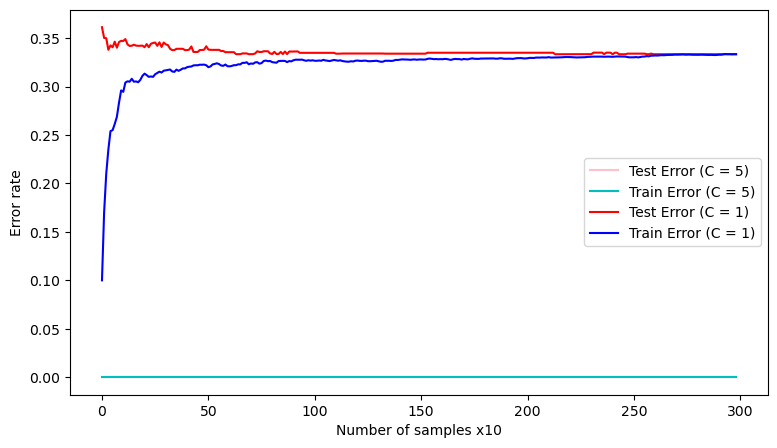

In [9]:
# Plot the average test error for the first set of experiments with higher complexity (C = 5) in pink.
p1, = plt.plot(np.mean(yhat_test[:,:,0].T,axis=1), color='pink', label='Test Error (C = 5)')

# Plot the average training error for the first set of experiments with higher complexity (C = 5) in cyan.
p2, = plt.plot(np.mean(yhat_train[:,:,0].T,axis=1), 'c', label='Train Error (C = 5)')

# Plot the average test error for the second set of experiments with lower complexity (C = 1) in red.
p3, = plt.plot(np.mean(yhat_test[:,:,1].T,axis=1), 'r', label='Test Error (C = 1)')

# Plot the average training error for the second set of experiments with lower complexity (C = 1) in blue.
p4, = plt.plot(np.mean(yhat_train[:,:,1].T,axis=1), 'b', label='Train Error (C = 1)')

# Configure the figure size for better visibility.
fig = plt.gcf()
fig.set_size_inches(9, 5)

# Label the x-axis as 'Number of samples x10'.
plt.xlabel('Number of samples x10')

# Label the y-axis as 'Error rate'.
plt.ylabel('Error rate')

# Add a legend to the plot to identify each line.
plt.legend(handles=[p1, p2, p3, p4], labels=["Test Error (C = 5)", "Train Error (C = 5)", "Test Error (C = 1)", "Train Error (C = 1)"])

# Display the plot.
plt.show()

Las curvas de aprendizaje representadas en el gráfico comparan dos modelos de árboles de decisión con diferentes niveles de complejidad, cuantificados por la profundidad de los árboles. Las líneas roja y rosa representan el error de prueba para modelos con complejidades `C = 5` y `C = 1` respectivamente, mientras que las líneas azul y cian representan los errores de entrenamiento correspondientes.

**Observaciones Clave e Interpretaciones**

- **Convergencia Temprana para el Modelo Más Simple:** Las curvas de aprendizaje para el modelo más simple (`C = 1`) convergen más rápidamente que aquellas para el modelo complejo (`C = 5`). Esto es indicativo de un modelo que tiene menos parámetros y, por lo tanto, menos capacidad para ajustarse a los datos, llevando a una estabilización más rápida de las tasas de error.

- **Meseta de Error Más Alta para el Modelo Más Simple:** La meseta de la tasa de error para `C = 1` está a un nivel más alto en comparación con `C = 5`, sugiriendo que el modelo más simple tiene un sesgo más alto y probablemente no se ajusta suficientemente a los datos.

- **Error de Entrenamiento vs. Error de Prueba:** Para el modelo complejo (`C = 5`), hay una brecha notable entre las tasas de error de entrenamiento y de prueba, sugiriendo un problema de varianza donde el modelo podría estar sobreajustándose a los datos de entrenamiento. Sin embargo, el modelo más simple (`C = 1`) muestra una brecha menor, lo cual es característico de un modelo de alto sesgo que no se ajusta tan bien a los datos de entrenamiento.

**Perspectivas Teóricas**

- **Compensación de Sesgo-Varianza:** El valor de convergencia al que se acercan ambos errores se conoce como el **sesgo** del modelo. La brecha entre los errores de entrenamiento y prueba se puede considerar como la **varianza**. Un alto sesgo es a menudo una señal de subajuste, mientras que una alta varianza indica sobreajuste.

- **Complejidad del Modelo y Ajuste de Datos:** Un modelo con `C = 5` es más complejo y tiene un sesgo más bajo, lo que le permite ajustarse mejor a los datos de entrenamiento. Sin embargo, esto también significa que tiene una mayor varianza, lo que lo hace propenso al sobreajuste. Por el contrario, el modelo con `C = 1` es demasiado simple para capturar las complejidades de los datos, lo que lleva a un sesgo más alto y una varianza más baja.

- **Comprensión de las Curvas de Aprendizaje:** Las curvas de aprendizaje son una herramienta de diagnóstico poderosa. Proporcionan indicaciones visuales sobre si agregar más datos probablemente mejorará el modelo (si las curvas aún están descendiendo) o si un modelo podría beneficiarse de una mayor complejidad (si las curvas han alcanzado una meseta muy por encima de la tasa de error deseada).

**Conclusiones**
En la práctica, estas percepciones nos ayudan a tomar decisiones informadas sobre la selección y entrenamiento de modelos:

- Para el modelo más simple (`C = 1`), podríamos necesitar aumentar la complejidad para reducir el sesgo si las tasas de error son insatisfactoriamente altas.
- Para el modelo más complejo (`C = 5`), deberíamos considerar técnicas como la poda, la regularización o la recopilación de más datos para combatir el sobreajuste si el error de prueba es significativamente más alto que el error de entrenamiento.

Finalmente, el objetivo es encontrar un equilibrio donde tanto el sesgo como la varianza se minimicen, proporcionando la mejor generalización posible para nuevos datos no vistos.


## 7.2 Sobreajuste

El sobreajuste (overfitting) es un concepto fundamental en machine learning que ocurre cuando un modelo aprende los datos de entrenamiento demasiado bien, incluyendo su ruido y valores atípicos, lo que disminuye su capacidad para generalizar a nuevos datos no vistos. Se caracteriza típicamente por una discrepancia significativa entre el rendimiento en los datos de entrenamiento y los datos de prueba, donde el modelo se desempeña excepcionalmente bien en los datos de entrenamiento pero pobremente en los datos de prueba.

Para ilustrar este fenómeno, examinaremos el comportamiento de aprendizaje de un modelo mientras variamos sistemáticamente su complejidad. Observando cómo cambian las curvas de aprendizaje a medida que ajustamos la capacidad del modelo para aprender de un número fijo de ejemplos, podemos obtener una visión más profunda de la relación entre la complejidad del modelo y el sobreajuste.

Las curvas de aprendizaje son herramientas visuales poderosas que muestran las tasas de error de un modelo tanto en los conjuntos de entrenamiento como de prueba a lo largo de un rango de complejidades. Un modelo con poca complejidad puede no ajustarse suficientemente y fallar en capturar patrones importantes en los datos, mientras que un modelo con demasiada complejidad puede sobreajustarse y capturar demasiado ruido. Al trazar estas curvas, nuestro objetivo es encontrar el "punto óptimo" donde el modelo es lo suficientemente complejo para aprender los patrones subyacentes pero lo suficientemente simple para mantener una buena generalización a nuevos datos.

En esta sección, exploraremos cómo los diferentes niveles de complejidad influyen en el proceso de aprendizaje y llevan a un subajuste o sobreajuste. Utilizaremos representaciones gráficas para hacer estos conceptos más tangibles y para demostrar el impacto práctico de la complejidad del modelo en los resultados de aprendizaje.

**PREGUNTA:** ¿Qué crees que pasará?
</div>

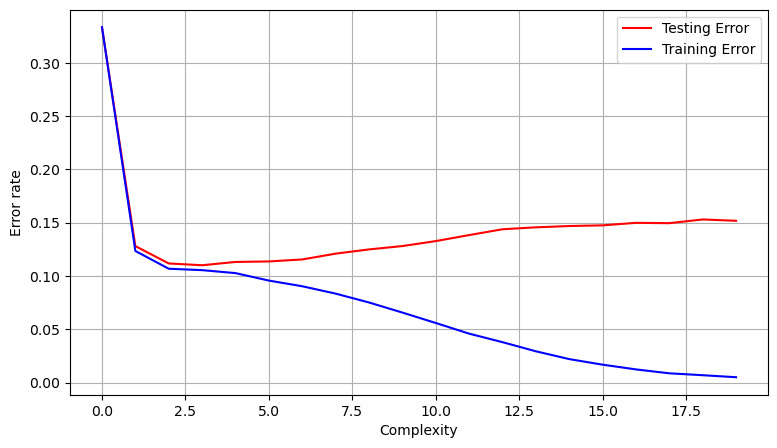

In [10]:
# Clear all variables from the current namespace to start with a clean slate.
%reset -f

# Import necessary libraries for numerical operations and plotting.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics  # For evaluating model accuracy
from sklearn import tree  # For using decision tree models

# Define maximum complexity, number of samples for training and testing, and number of iterations.
MAXC = 20  # Maximum complexity
N = 1000  # Number of training samples
NTEST = 4000  # Number of testing samples
ITERS = 3  # Number of iterations for averaging

# Initialize arrays to store the testing and training error rates.
yhat_test = np.zeros((ITERS, MAXC, 2))
yhat_train = np.zeros((ITERS, MAXC, 2))

# Repeat the experiment several times to get smoother average error curves.
for i in range(ITERS):
    # Generate synthetic training data from a mixture of normal distributions.
    X = np.concatenate([1.25*np.random.randn(N,2), 5+1.5*np.random.randn(N,2)]) 
    X = np.concatenate([X, [8,5]+1.5*np.random.randn(N,2)])
    y = np.concatenate([np.ones((N,1)), -np.ones((N,1))])
    y = np.concatenate([y, np.ones((N,1))])
    
    # Randomly shuffle the training data.
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    # Generate synthetic testing data using the same distributions as the training data.
    X_test = np.concatenate([1.25*np.random.randn(NTEST,2), 5+1.5*np.random.randn(NTEST,2)]) 
    X_test = np.concatenate([X_test, [8,5]+1.5*np.random.randn(NTEST,2)])
    y_test = np.concatenate([np.ones((NTEST,1)), -np.ones((NTEST,1))])
    y_test = np.concatenate([y_test, np.ones((NTEST,1))])
    
    # Loop over a range of complexities for the decision tree model.
    j = 0
    for C in range(1, MAXC+1):
        # Train a decision tree classifier with the current complexity (depth).
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(X, y.ravel())  # Fit the model to the training data.
        
        # Evaluate the model on the testing set and record the error rate.
        yhat_test[i, j, 0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        # Evaluate the model on the training set and record the error rate.
        yhat_train[i, j, 0] = 1. - metrics.accuracy_score(clf.predict(X), y.ravel())
        j += 1

# Plot the average testing error (in red) and training error (in blue) across all iterations.
p1, = plt.plot(np.mean(yhat_test[:,:,0].T,axis=1), 'r', label='Testing Error')
p2, = plt.plot(np.mean(yhat_train[:,:,0].T,axis=1), 'b', label='Training Error')

# Set the figure size for clear visibility.
fig = plt.gcf()
fig.set_size_inches(9, 5)

# Label the axes and add a legend to the plot.
plt.xlabel('Complexity')
plt.ylabel('Error rate')
plt.legend(handles=[p1, p2], labels=["Testing Error", "Training Error"])

# Enable the grid for better readability of the plot.
plt.grid(True)

# Display the plot.
plt.show()

El gráfico anterior proporciona una representación visual de la relación entre la complejidad del modelo y las tasas de error, lo cual es un factor clave para entender el sobreajuste en los modelos de machine learning.

**Error de Entrenamiento vs Error de Prueba**

Como se muestra en el gráfico, el error de entrenamiento (mostrado en azul) disminuye consistentemente a medida que aumenta la complejidad del modelo. Esto se espera porque un modelo más complejo tiene más parámetros o reglas de decisión que pueden capturar los patrones intrincados y matices en los datos de entrenamiento. Sin embargo, esto no necesariamente significa que un modelo complejo sea mejor.

**El Fenómeno del Sobreajuste**

El error de prueba (mostrado en rojo) inicialmente disminuye con la complejidad, reflejando que la capacidad del modelo para generalizar está mejorando. Pero pasado cierto punto, el error de prueba comienza a aumentar, incluso mientras el error de entrenamiento continúa disminuyendo. Esta divergencia es el sello distintivo del sobreajuste. Indica que, mientras el modelo se sintoniza cada vez más con los datos de entrenamiento, también se vuelve menos capaz de rendir bien en datos no vistos.

El aumento en el error de prueba sugiere que la complejidad del modelo ha superado el nivel óptimo. En lugar de aprender la tendencia subyacente de los datos, el modelo comienza a aprender el ruido en el conjunto de entrenamiento. Esto reduce su capacidad de generalización, lo cual es contraproducente para el propósito del modelado predictivo.

**Conclusión**

La complejidad óptima del modelo se encuentra justo antes de que el error de prueba comience a aumentar. En este punto, el modelo es lo suficientemente complejo para capturar los patrones necesarios en los datos pero no tan complejo como para comenzar a aprender el ruido. Por lo tanto, equilibrar la complejidad del modelo es crucial para construir modelos robustos que generalicen bien a nuevos datos, evitando las trampas del sobreajuste.

**PREGUNTA:** Volvamos a los problemas de regresión. Considera que conocemos el modelo subyacente que genera muestras de datos. Por ejemplo, los datos son generados por un polinomio de 10º orden. Marca todas las respuestas correctas:

<li> Usaré un polinomio de 10º orden como mi modelo.
<li> Usaré un polinomio de 2º orden como mi modelo.
<li> Si tengo un pequeño número de datos debo usar un polinomio de orden pequeño.
<li> Si tengo una gran cantidad de datos puedo usar un polinomio de décimo orden.
</div>

# 8. Curas para el sobreajuste

El sobreajuste es como memorizar las respuestas de un examen en lugar de entender la materia. Ocurre cuando nuestro modelo aprende los datos de entrenamiento tan bien, incluyendo el ruido y detalles que no son relevantes, que se desempeña mal en cualquier dato nuevo. Piénsalo como estudiar tan a fondo de un libro específico que no puedes responder preguntas de ningún otro libro. Para prevenir esto, tenemos varias estrategias:

- **Selección de Modelo mediante Ajuste de Hiperparámetros**: Los hiperparámetros son las configuraciones en nuestro modelo que podemos ajustar para controlar su proceso de aprendizaje. Por ejemplo, en un árbol de decisión, podemos limitar cuán profundo crece el árbol. Elegir los hiperparámetros correctos es como elegir el nivel adecuado de detalle para estudiar: demasiado poco y no aprendes lo suficiente; demasiado y aprendes detalles innecesarios.

    Un enfoque común para encontrar los mejores hiperparámetros es mediante **validación cruzada**. Esta técnica implica dividir los datos en varias partes, entrenar el modelo en algunas partes y probarlo en otras, y luego hacer esto varias veces. Es como hacer varios exámenes de práctica para encontrar la mejor manera de estudiar. Los valores de hiperparámetros que dan el mejor rendimiento en las partes de prueba de los datos suelen ser una buena elección.
    

- **Regularización**: La regularización es una técnica que desalienta aprender un modelo más complejo o flexible, para prevenir el sobreajuste. Esto se hace añadiendo una penalización por complejidad al error del modelo durante el proceso de entrenamiento.

    Piensa en la regularización como una regla en la escritura de ensayos que limita el número de palabras que puedes usar. Si te obligan a escribir tu ensayo en menos palabras, solo te centrarás en los puntos más importantes. La regularización hace esto penalizando al modelo por ser demasiado complejo.
    

- **Conjuntos (Ensembles)**: Los conjuntos implican combinar las predicciones de varios modelos para mejorar la robustez sobre un solo modelo. Imagina que, en lugar de tomar un examen por tu cuenta, pudieras formar un equipo con tus compañeros de clase y presentar un conjunto combinado de respuestas en las que todos estén de acuerdo. Esta es la idea detrás de los conjuntos: al agrupar el conocimiento de varios modelos, a menudo podemos obtener una predicción más precisa y fiable.

    Un método común de conjunto es llamado **bagging**, donde creamos muchas variaciones aleatorias de los datos de entrenamiento, construimos un modelo para cada una y luego obtenemos la salida final promediando los resultados o dejándolos votar. Otro método es **boosting**, donde los modelos aprenden en sucesión, cada uno intentando corregir los errores de su predecesor.
    
Cada uno de estos métodos tiene sus propias ventajas y es adecuado para diferentes situaciones. Al entender y aplicar estas estrategias, podemos crear modelos que no solo se ajustan bien a los datos de entrenamiento sino que también se desempeñan excelentemente en datos no vistos.

## 8.1 Cura I: Uso de la selección de modelos.

El arte de la selección de modelos es similar a elegir la herramienta adecuada para una tarea; no todas las herramientas son adecuadas para cada trabajo. Anteriormente, discutimos cómo seleccionar entre diferentes clasificadores comparando su error de generalización, denotado como ${E}_{\text{out}}$. El clasificador que demostró el menor ${E}_{\text{out}}$ era típicamente nuestra herramienta de elección, ya que indicaba el mejor rendimiento en datos no vistos.

> **Intuición:** Seleccionar los mejores hiperparámetros para un modelo es conceptualmente similar a elegir el mejor clasificador. Imagina tener una caja de herramientas donde cada herramienta tiene configuraciones ajustables (hiperparámetros) que pueden alterar su efectividad. Nuestro objetivo es determinar las configuraciones óptimas que mejoren el rendimiento de la herramienta (modelo) para nuestra tarea específica.

Para lograr esto, empleamos una técnica conocida como **validación cruzada**. Esto implica dividir nuestro conjunto de datos en varios subconjuntos más pequeños, entrenar nuestro modelo en algunos y validar su rendimiento en otros. A través de este proceso iterativo, podemos evaluar la efectividad de diferentes configuraciones de hiperparámetros.

[VIDEO: Validación cruzada](https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer)

El procedimiento de ajustar y validar estas configuraciones para identificar el modelo más efectivo se denomina **validación de hiperparámetros**. Es un paso crucial en el proceso de construcción del modelo, asegurando que no solo ajustamos bien nuestro modelo a los datos de entrenamiento sino que también mejoramos su capacidad para generalizar a nuevos datos no vistos. Así es como transformamos los datos brutos en una lente pulida, trayendo los patrones dentro de un enfoque más nítido, permitiendo que nuestro modelo haga predicciones precisas en una variedad de escenarios.

Al seleccionar meticulosamente los hiperparámetros de nuestro modelo, encontramos un equilibrio entre las sutilezas de nuestros datos y el poder predictivo de nuestro modelo, administrando así un remedio a la dolencia común del sobreajuste.

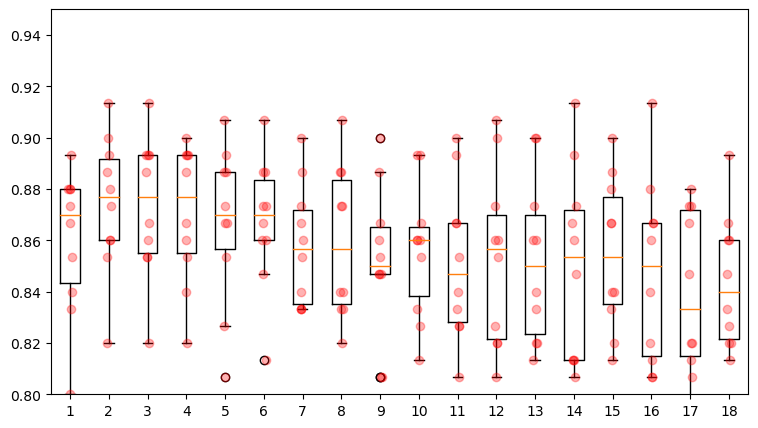

In [11]:
# Clear all variables from the current namespace to avoid conflicts.
%reset -f

# Import necessary packages.
import numpy as np  # For numerical computations.
import matplotlib.pyplot as plt  # For plotting graphs.
from sklearn import metrics  # For calculating accuracy and other performance metrics.
from sklearn import tree  # For decision tree models.
from sklearn import model_selection  # For cross-validation and model selection utilities.

# Create a synthetic dataset for the demonstration.
N = 500  # Number of samples
# Generate points from normal distributions to form our dataset.
X = np.concatenate([1.25*np.random.randn(N,2), 5+1.5*np.random.randn(N,2)]) 
X = np.concatenate([X, [8, 5]+1.5*np.random.randn(N,2)])
y = np.concatenate([np.ones((N,1)), -np.ones((N,1))])
y = np.concatenate([y, np.ones((N,1))])

# Set up a 10-fold cross-validation. This will split our data into 10 parts.
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
kf.get_n_splits()

# Prepare to search for the best complexity parameter from the given range.
C = np.arange(2, 20)  # Range of model complexities to evaluate.

# Initialize an array to store accuracy scores for different folds and complexities.
acc = np.zeros((10, len(C)))  # 10 for folds, 18 for the range of complexities.
i = 0
# Perform cross-validation.
for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets for the current fold.
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    j = 0
    # Evaluate the model for each complexity level.
    for c in C:
        # Initialize and train a decision tree classifier at the current complexity level.
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)
        dt.fit(X_train, y_train.ravel())  # Train the model.
        yhat = dt.predict(X_val)  # Predict validation set outcomes.
        
        # Calculate and store the accuracy for the current fold and complexity.
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j += 1
    i += 1

# Plot the accuracy for each complexity as a boxplot to show the distribution.
plt.boxplot(acc)
# Overlay the individual accuracy scores for each complexity level.
for i in range(len(C)):
    xderiv = (i+1)*np.ones(acc[:,i].shape) + (np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv, acc[:,i], 'ro', alpha=0.3)  # 'ro' indicates red circle markers.

# Set the limits for the y-axis to focus on the range of interest.
plt.ylim((0.80, 0.95))

# Configure the figure size for better visibility.
fig = plt.gcf()
fig.set_size_inches(9, 5)

En el aprendizaje automático, seleccionar el modelo adecuado es tan crucial como ajustar el modelo en sí. Es como elegir la llave correcta para una cerradura; la correcta encaja perfectamente y desbloquea el potencial. En nuestra búsqueda de este "ajuste perfecto", empleamos una técnica conocida como **validación cruzada**. Esta técnica nos ayuda a afinar los hiperparámetros de nuestro modelo, específicamente su complejidad, para asegurar que generalice bien a datos no vistos.

Aquí tienes un desglose paso a paso de lo que estamos haciendo en el código Python proporcionado:

1. **Creación de un Conjunto de Datos Sintético**: Comenzamos generando datos artificiales, lo que nos permite controlar los patrones subyacentes y el ruido. Este conjunto de datos sintético es un campo de juego donde podemos experimentar libremente con nuestros modelos sin el riesgo de datos del mundo real impredecibles.

2. **Configuración de la Validación Cruzada**: Utilizamos un método llamado validación cruzada K-Fold, que implica dividir nuestro conjunto de datos en 'K' partes (10 en nuestro caso). Entrenamos nuestro modelo en 'K-1' partes y lo validamos en la parte restante, rotando la parte de validación cada vez, para que cada punto de datos tenga la oportunidad de estar en el conjunto de validación.

3. **Búsqueda de la Mejor Complejidad del Modelo**: Exploramos una gama de complejidades para nuestro modelo, que, en este escenario, es un clasificador de Árbol de Decisión. La complejidad se controla por la profundidad máxima del árbol, que varía de 2 a 20. Un árbol poco profundo (baja complejidad) podría no capturar todos los patrones (subajuste), mientras que un árbol profundo (alta complejidad) podría aprender demasiado ruido (sobreajuste).

4. **Entrenamiento y Validación del Modelo**: Para cada nivel de complejidad, entrenamos un nuevo Árbol de Decisión y evaluamos su precisión en el conjunto de validación. Repetimos este proceso en todos los pliegues de nuestra configuración de validación cruzada.

5. **Análisis de los Resultados**: Recopilamos las puntuaciones de precisión de cada pliegue y nivel de complejidad y las graficamos usando diagramas de caja, que nos muestran la distribución de las puntuaciones de precisión para cada nivel de complejidad. También agregamos puntos de datos individuales al gráfico para una mirada detallada al rendimiento de cada pliegue.

6. **Elección de la Complejidad Óptima**: El objetivo es seleccionar el nivel de complejidad donde el modelo se desempeña consistentemente bien en diferentes conjuntos de validación. Este nivel indica un buen equilibrio entre aprender los patrones de los datos y mantener la capacidad de generalizar.

7. **Visualización del Resultado**: Finalmente, usamos un gráfico para visualizar nuestros hallazgos. El eje x representa la complejidad del modelo, mientras que el eje y muestra la tasa de precisión. Los diagramas de caja nos ayudan a ver la variación en el rendimiento en diferentes pliegues, y los puntos rojos representan puntuaciones de precisión individuales, dándonos una idea de la variabilidad en el rendimiento del modelo.

A través de este proceso, nuestro objetivo es lograr un equilibrio delicado: un modelo lo suficientemente complejo para aprender los patrones importantes pero lo suficientemente simple para ignorar el ruido. Este equilibrio es la clave para un modelo que se desempeña bien no solo en nuestros datos actuales, sino también en datos futuros que nunca ha visto antes.

In [12]:
# Calculate the mean accuracy across all cross-validation folds for each complexity level.
macc = np.mean(acc, axis=0)

# Find the index of the complexity level that yields the highest mean accuracy.
idx = np.argmax(macc)

# Print the complexity level (adding 1 because the index starts at 0) and the corresponding accuracy.
# This tells us which model (in terms of complexity) performed the best on average across the cross-validation folds.
print('Complexity: ' + str(idx+1) + ' with accuracy: ' + str(macc[idx]))

Complexity: 2 with accuracy: 0.874


Este fragmento de código realiza el paso final en la selección del modelo mediante validación cruzada. Después de entrenar y validar el modelo a través de un rango de complejidades, determina qué nivel de complejidad dio la mejor precisión media, sugiriéndolo como la elección óptima para este problema en particular. La sentencia de impresión proporciona una salida clara y legible por humanos, mostrando la complejidad del modelo elegido y su precisión de validación, guiando los siguientes pasos en el flujo de trabajo del aprendizaje automático.

¿Cuál es el error de generalización esperado al seleccionar este método?

In [13]:
# Initialize a decision tree classifier with the optimal complexity found previously.
# 'min_samples_leaf=1' means each leaf node must contain at least 1 sample.
# 'max_depth=idx+1' sets the depth of the tree to the best complexity level identified from cross-validation.
dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=idx+1)

# Fit the decision tree model to the training data.
# This step involves the model learning from the training data, using the optimal complexity we identified.
dt.fit(X_train, y_train)

# Set the number of samples for generating out-of-sample (new, unseen) data to test the model's generalization.
N = 1000

# Generate out-of-sample data to test the model.
# This data follows the same distribution as the training data but is completely new to the model.
X_test = np.concatenate([1.25*np.random.randn(N,2), 5+1.5*np.random.randn(N,2)]) 
X_test = np.concatenate([X_test, [8,5]+1.5*np.random.randn(N,2)])
y_test = np.concatenate([np.ones((N,1)), -np.ones((N,1))])
y_test = np.concatenate([y_test, np.ones((N,1))])

# Use the trained model to predict the labels of the out-of-sample data.
yhat = dt.predict(X_test)

# Calculate and print the accuracy of the model on the out-of-sample data.
# This gives us an estimate of how well our model can generalize to new data,
# which is crucial for understanding its performance in real-world scenarios.
print(metrics.accuracy_score(yhat, y_test))

0.873


Este fragmento de código muestra la evaluación final de un clasificador de árbol de decisión entrenado con la complejidad óptima determinada mediante validación cruzada. Al generar nuevos datos no vistos y comparar las predicciones del modelo con las etiquetas verdaderas, evaluamos la capacidad del modelo para generalizar más allá de los datos de entrenamiento. La sentencia print muestra la precisión del modelo en estos datos fuera de la muestra, proporcionando una medida cuantitativa de su rendimiento de generalización.

### 8.1.1 Train, Test y Validación.

Como hemos visto, el proceso de evaluar el rendimiento del clasificador estimando el error de generalización se llama prueba. Y el proceso de seleccionar un modelo utilizando la estimación del error de generalización se llama validación. Hay una diferencia sutil pero crítica en ambos y debemos ser conscientes de ello al tratar con nuestro problema.

+ Los datos de prueba se utilizan solo para evaluar el rendimiento y nunca se utilizarán en el proceso de aprendizaje.
+ Los datos de validación se utilizan para seleccionar explícitamente el parámetro con el mejor rendimiento según una estimación del error de generalización. Esto es una forma de aprendizaje.
+ Los datos de entrenamiento se utilizan para aprender la instancia del modelo de una clase de modelo.

En la práctica, solo se nos dan datos de entrenamiento y, en el caso más general, tenemos que ajustar explícitamente algún hiperparámetro. Entonces, ¿cómo seleccionamos las diferentes divisiones?

Dependerá de las preguntas sobre el método que queremos responder:

+ Digamos que nuestro cliente nos pide que le entreguemos un clasificador para un problema dado. Si solo queremos darle el mejor modelo, entonces podemos usar la validación cruzada en nuestro conjunto de datos de entrenamiento y seleccionar el modelo de mejor rendimiento. En este escenario, cuando devolvemos el clasificador entrenado a nuestro cliente, sabemos que es el que logra el mejor rendimiento. Pero si el cliente pregunta sobre el rendimiento esperado, no podemos decir nada.

> **Un problema práctico:** una vez seleccionado el modelo, usamos el conjunto de entrenamiento completo para entrenar el modelo final.

+ Si queremos conocer el rendimiento de nuestro modelo, tenemos que usar datos no vistos. Por lo tanto, podemos proceder de la siguiente manera:

    + Dividir el conjunto de entrenamiento en datos de entrenamiento y prueba. Por ejemplo, usar el $30\%$ del conjunto de entrenamiento para fines de prueba. Estos datos se reservan y solo se utilizarán para evaluar el rendimiento del método.

    + Usar los datos de entrenamiento restantes para seleccionar los hiperparámetros mediante validación cruzada.
    
    + Entrenar el modelo con el parámetro seleccionado y evaluar el rendimiento utilizando el conjunto de datos de prueba.

> **Un problema práctico:** Observa que al dividir en tres conjuntos, el clasificador se entrena con una fracción más pequeña de los datos.

+ Si queremos hacer una buena comparación de clasificadores pero no nos importan los mejores parámetros, podemos usar la validación cruzada anidada. La validación cruzada externa se utiliza para evaluar el rendimiento del clasificador y en cada ciclo de la validación cruzada externa se realiza otra validación cruzada con el conjunto de entrenamiento restante para seleccionar los mejores parámetros.

## 8.2 Cura II: Uso de la regularización

Cuando entrenamos modelos, uno de nuestros mayores temores es el sobreajuste: cuando nuestro modelo aprende el ruido en los datos de entrenamiento tan bien que se desempeña mal en nuevos datos no vistos. Imagina memorizar cada respuesta de un examen de práctica sin entender los conceptos; podrías pasar ese examen de práctica pero fallar en el examen real porque las preguntas no son exactamente las mismas. Eso es el sobreajuste en pocas palabras, y la regularización es una de las herramientas que usamos para prevenirlo.

La regularización nos ayuda a controlar la complejidad de nuestro modelo, asegurando que no sea demasiado simple (subajuste) ni demasiado complejo (sobreajuste). Lo hace añadiendo una penalización sobre el tamaño de los coeficientes, lo cual puede ser visto como una manera de alentar al modelo a ser lo más simple posible mientras aún se ajusta bien a los datos.

### Regularización L2 (Ridge)

La regularización L2, también conocida como regularización Ridge, añade una penalización igual al cuadrado de la magnitud de los coeficientes. Este método prefiere coeficientes más pequeños pero no los fuerza a cero. En muchos casos, la regularización L2 puede ser vista como alentando a las predicciones del modelo a ser "suaves" en lugar de fluctuar salvajemente. Esta suavidad a menudo se traduce en menor complejidad, ya que evita que el modelo se ajuste demasiado al ruido de los datos de entrenamiento.

[VIDEO: Regularización L2](https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer)

### Regularización L1 (Lasso)

Por otro lado, la regularización L1, conocida como regularización Lasso, añade una penalización igual al valor absoluto de la magnitud de los coeficientes. A diferencia de L2, L1 puede reducir algunos coeficientes a cero, realizando efectivamente una selección de características. Esta propiedad es increíblemente útil cuando sospechamos que algunas características pueden no ser importantes o cuando deseamos un modelo que sea fácil de interpretar (ya que solo usa un subconjunto de todas las características disponibles). También es útil cuando se trata de datos de alta dimensión, donde la eficiencia computacional se vuelve crucial.

[VIDEO: Regularización L1](https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer)

### Selección de la Fuerza de Regularización

Tanto la regularización L2 como la L1 tienen un hiperparámetro que controla la fuerza de la penalización. Este hiperparámetro es crucial porque equilibra el compromiso entre ajustar bien los datos de entrenamiento y mantener el modelo lo suficientemente simple para generalizar a nuevos datos. Demasiada regularización podría llevar a un subajuste, mientras que muy poca podría llevar a un sobreajuste.

Seleccionar la fuerza de regularización óptima es, por lo tanto, una forma de selección de modelo. Típicamente usamos la validación cruzada para elegir este hiperparámetro, probando diferentes valores para encontrar el que da el mejor rendimiento en un conjunto de validación o a través de un proceso de validación cruzada.

En resumen, la regularización es un concepto poderoso en el aprendizaje automático para controlar la complejidad del modelo y prevenir el sobreajuste. Al elegir cuidadosamente el tipo de regularización y su fuerza, podemos construir modelos que no solo se desempeñan bien en nuestros datos de entrenamiento, sino que también son capaces de generalizar a nuevos datos no vistos.

## 8.3 Cura III: Conjunto (Ensemble)

En nuestro kit de herramientas para combatir el desafío omnipresente del sobreajuste, los métodos de conjunto se destacan como una estrategia poderosa. Estas técnicas involucran combinar las predicciones de múltiples modelos para mejorar el rendimiento general y la robustez de la predicción. Es como buscar el consejo de un grupo de expertos en lugar de confiar en la opinión de un solo individuo. Entre las diversas técnicas de conjunto, **Bagging** y **Boosting** son particularmente notables por su efectividad.

### Bagging: Agregación por Bootstrap

**Bagging**, abreviatura de Bootstrap Aggregating, es una técnica que tiene como objetivo reducir la varianza y evitar el sobreajuste. La idea central detrás del bagging es crear varios subconjuntos de los datos de entrenamiento originales, con reemplazo, y luego entrenar un modelo separado en cada subconjunto. La predicción final se hace típicamente promediando las predicciones de todos los modelos (para problemas de regresión) o mediante votación mayoritaria (para problemas de clasificación). Este método es efectivo porque combina la fuerza de múltiples modelos, cada uno entrenado en datos ligeramente diferentes, lo que lleva a una predicción más estable y robusta. Los Bosques Aleatorios, uno de los algoritmos de aprendizaje automático más populares, es un ejemplo de bagging donde los árboles de decisión son los aprendices base.

### Boosting: Construyendo Fuerza desde la Debilidad

**Boosting** es otra técnica de conjunto, pero difiere de bagging en su enfoque. Boosting se centra en convertir una serie de modelos débiles en uno fuerte. Lo hace entrenando modelos secuencialmente, donde cada nuevo modelo se enfoca en corregir los errores cometidos por los anteriores. Al centrarse continuamente en las observaciones más difíciles de predecir, los métodos de boosting, como AdaBoost y Gradient Boosting, mejoran incrementalmente el rendimiento del modelo. Boosting es particularmente conocido por su capacidad para ajustar el compromiso entre sesgo y varianza, logrando alta precisión sin caer en el sobreajuste tan fácilmente como algunos otros métodos.

### Métodos de Conjunto en la Práctica

Aunque los métodos de conjunto son increíblemente poderosos, también introducen complejidad adicional, tanto en términos de comprensión como de requisitos computacionales. Elegir entre bagging y boosting (u otros métodos de conjunto) depende del problema específico, el tipo de datos y los modelos que se combinan. Sin embargo, el principio subyacente sigue siendo el mismo: al agregar sabiamente las predicciones de múltiples modelos, podemos crear un sistema de predicción más preciso y robusto.

# 9. ¿Qué hacer cuando...?

... nuestro algoritmo muestra un alto **sesgo**.

- **Agregar más características** Si somos capaces de ingeniar características discriminantes, esto podría ayudar al clasificador a reducir su sesgo.
- **Usar un modelo más sofisticado**. Un alto sesgo generalmente significa un rendimiento deficiente. Si estamos utilizando una clase de modelo muy simple, esto podría indicar que esta clase de modelo no es capaz de ajustarse adecuadamente a los datos de entrenamiento. Si nuestro problema utiliza la regularización para modelar la complejidad, podríamos ajustar el hiperparámetro para disminuir la complejidad.
- **Usar menos muestras**. Aunque esto no mejorará los resultados, podríamos entrenar el modelo con menos puntos de datos solo para mejorar el tiempo de entrenamiento sin empeorar el rendimiento.

... nuestro algoritmo muestra **alta varianza**.

- **Usar menos características**. Utilizar técnicas de selección de características o de reducción de dimensionalidad puede ser útil y disminuir el sobreajuste del estimador.
- **Usar un modelo más simple**. Una alta varianza generalmente es sinónimo de modelar de cerca el conjunto de entrenamiento. Esto puede resultar en sobreajuste. En este caso, podemos usar una clase de modelo más simple o ajustar el hiperparámetro de regularización para disminuir la complejidad.
- **Usar más muestras de entrenamiento**. Añadir más datos al conjunto de entrenamiento puede ayudar a reducir la varianza ya que proporciona una base de aprendizaje más amplia, lo que permite al modelo generalizar mejor.
- **Usar técnicas de conjunto**. Algunas técnicas de conjunto, como la *agregación de bootstrap*, están específicamente diseñadas para reducir la varianza de clasificación.